# 1. Importing Libraries

In [72]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px
import graphviz
import io
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree   
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

# 2. Importing the Dataset

In [73]:
df = pd.read_csv("hotel_bookings.csv", encoding="ISO-8859-1")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2.2 Getting Some Information about the Dataset

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [75]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# 3. Preprocessing Part

## 3.1 Finding Missing Values

In [76]:
total = df.isnull().sum().sort_values(ascending=False)
print(total)
percent = df.isnull().sum()/df.isnull().count()*100
percent = round(percent,1).sort_values(ascending=False)
missingData = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missingData.head()

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

,Total,%
company,112593,94.3
agent,16340,13.7
country,488,0.4
children,4,0.0
lead_time,0,0.0


#### 94.3% of the "company" feature is missing, so I'll just drop it

#### I'll also drop the "agent" feature because it represents an ID and it's a bit useless.

In [77]:
df.drop(['company', "agent"], axis = 1, inplace=True) 

#### I'll fill the "children" feature with the most common one

In [78]:
df["children"].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [79]:
commonValue = 0
df["children"].fillna(commonValue, inplace=True)

#### Same thing for "country" feature

In [80]:
df["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
UMI        1
MLI        1
BFA        1
LCA        1
NCL        1
Name: country, Length: 177, dtype: int64

In [81]:
df["country"].fillna("PRT", inplace=True)

## 3.2 Verifying Data

In [82]:
df.isnull().sum().sum()

0

#### We can move to the next step

## 3.3 Feature Transformation

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### I'll not convert any values yet.

# 4. Data Visualization

## 4.1 Data Distribution

### Hotel

<AxesSubplot:xlabel='hotel', ylabel='count'>

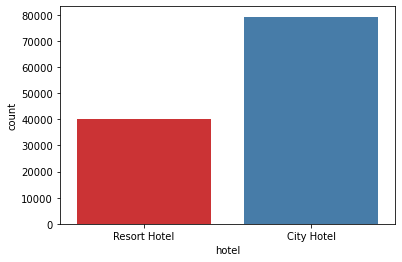

In [84]:
sns.countplot(df["hotel"], palette="Set1")

#### City Hotels are 2x more present than Resort Hotels

### Cancelled

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

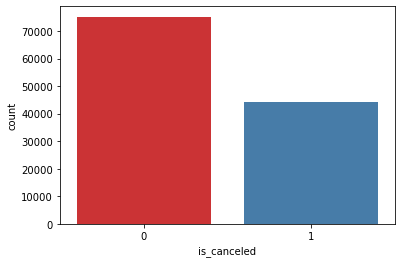

In [85]:
sns.countplot(df["is_canceled"], palette="Set1")

### Lead Time

<AxesSubplot:xlabel='lead_time'>

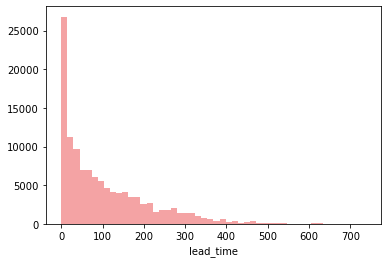

In [86]:
sns.distplot(df["lead_time"],kde=False)

#### Most of the lead_time is less than 50 days

### Arrival Year

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

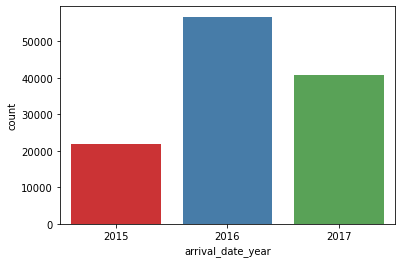

In [87]:
sns.countplot(df["arrival_date_year"], palette="Set1")

#### Most of the Arrivals to the hotels happened in 2016

### Arrival Month

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

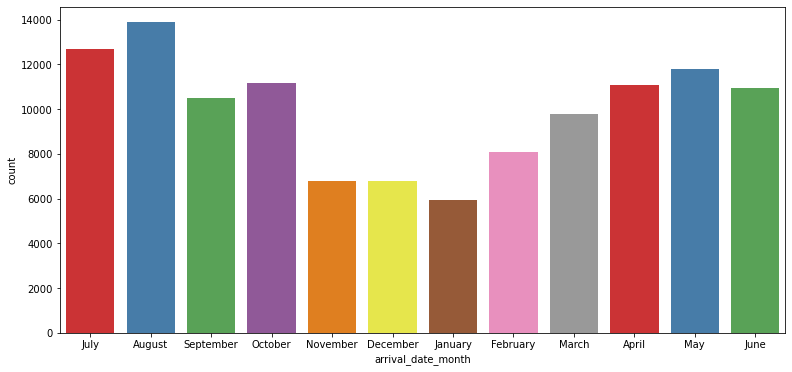

In [88]:
plt.figure(figsize=(13, 6))
sns.countplot(df["arrival_date_month"], palette="Set1")

#### Most of the arrivals to the hotels happen at July/August (Summer time) and are less frequent in December/January (Winter Time)

### Adults

<AxesSubplot:xlabel='adults', ylabel='count'>

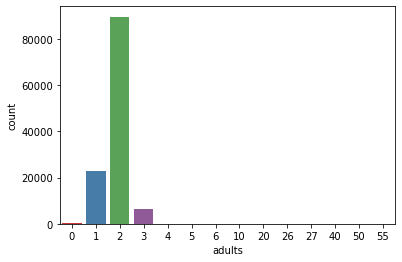

In [89]:
sns.countplot(df["adults"], palette="Set1")

#### Most of the time, there are 2 adults, but there are really rare cases where there are 20, 40, or even 50 adults !

### Children

<AxesSubplot:xlabel='children', ylabel='count'>

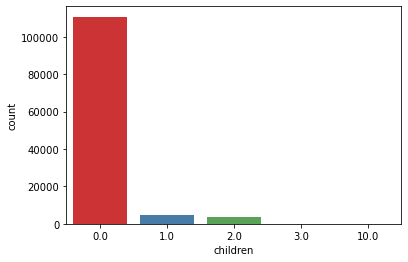

In [90]:
sns.countplot(df["children"], palette="Set1")

#### We can notice that most of the time, there aren't any child.

### Babies

<AxesSubplot:xlabel='babies', ylabel='count'>

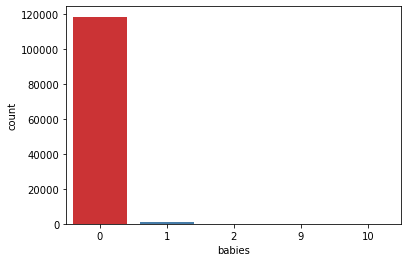

In [91]:
sns.countplot(df["babies"], palette="Set1")

#### Same for Babies

### Country

In [92]:
country_data = pd.DataFrame(df["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
             
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [93]:
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

### Meal

<AxesSubplot:xlabel='meal', ylabel='count'>

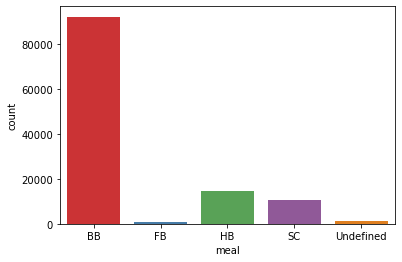

In [94]:
sns.countplot(df["meal"], palette="Set1")

#### Note : BB = Bed & Breakfast, FB = Full board (breakfast, lunch and dinner), HB = Half board (breakfast and one other meal – usually dinner), 3/4 = Undefined/SC – no meal package

#### We can see that in most of the cases, clients book a Bed & Breakfast package

### Repeated Guest

<AxesSubplot:xlabel='is_repeated_guest', ylabel='count'>

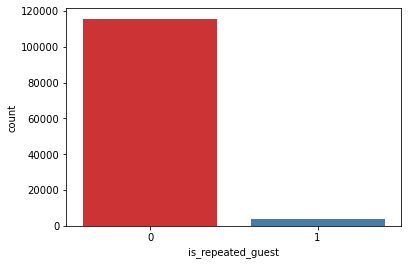

In [95]:
sns.countplot(df["is_repeated_guest"], palette="Set1")

#### There are only a few cases where guests come back

### Booking Changes

<AxesSubplot:xlabel='booking_changes'>

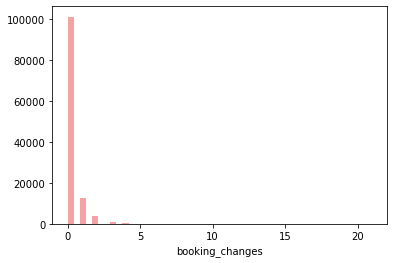

In [96]:
sns.distplot(df["booking_changes"], kde=False, bins=50)

#### Most of the customers don't make any booking change

### Deposit Type

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

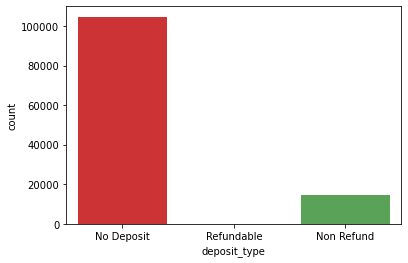

In [97]:
sns.countplot(df["deposit_type"], palette="Set1")

#### Most of the customers don't make any deposit

### Customer Type

<AxesSubplot:xlabel='customer_type', ylabel='count'>

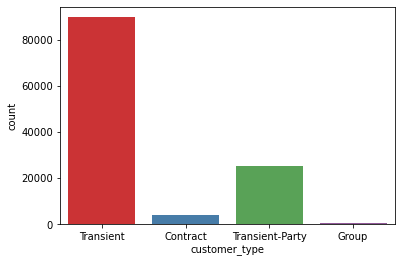

In [98]:
sns.countplot(df["customer_type"], palette="Set1")

#### Most of the customers are Transient (when the booking is not part of a group or contract, and is not associated to other transient booking;)

### Required Parking Space

<AxesSubplot:xlabel='required_car_parking_spaces', ylabel='count'>

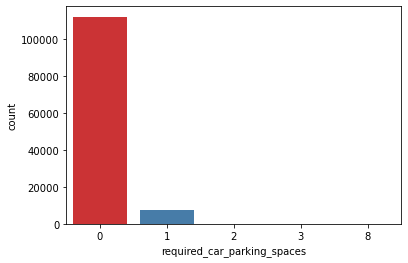

In [99]:
sns.countplot(df["required_car_parking_spaces"], palette="Set1")

#### Most of the customers don't require any parking space

### Total of Special Requests

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

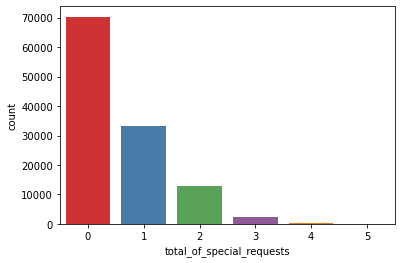

In [100]:
sns.countplot(df["total_of_special_requests"], palette="Set1")

#### Most of the customers don't have any special request

### 4.2 Correlation between some variables

### Is Cancelled and Type of Hotel

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

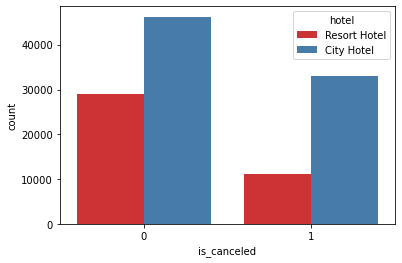

In [101]:
sns.countplot(x="is_canceled", hue="hotel", data=df, palette="Set1")

#### As you can see, there are more cancellations on a City Hotel than on a Resort Hotel

### Customer Type

<AxesSubplot:xlabel='customer_type', ylabel='count'>

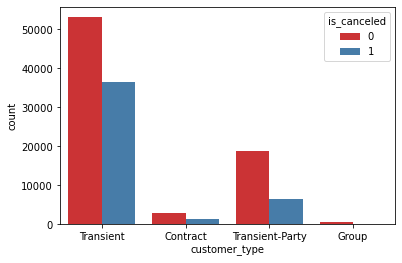

In [102]:
sns.countplot(x="customer_type", hue="is_canceled", data=df, palette="Set1")

#### We can notice that :
- There are only few cases where "Group" customers cancel
- "Transient-Party" customers cancel less than other types
- "Transient" customers are those who cancel the most.

### Arrival Month

Text(0, 0.5, '% of cancelations')

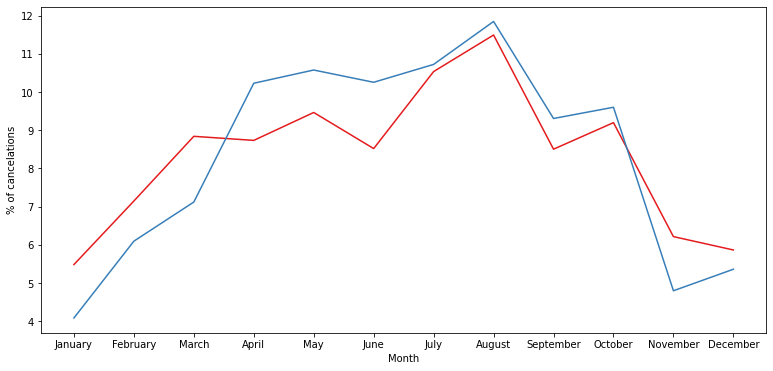

In [103]:
df_not_canceled = df[df['is_canceled'] == 0]
df_canceled = df[df['is_canceled'] == 1]
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)
csorted_months = df_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100
z = csorted_months.index
t = csorted_months/csorted_months.sum()*100

plt.figure(figsize=(13, 6))
sns.lineplot(x, y.values, sort=False)
sns.lineplot(z, t.values, sort=False)
sns.set_palette("Set1")
plt.xlabel("Month")
plt.ylabel("% of cancelations")

#### As you can see, cancelations are very frequent in July/August and they start decreasing at the end/start of the year

## 4.3 Plot Correlation Matrix

#### Before that, we must convert all the features to numerical values

In [104]:
encoder = LabelEncoder()
def encode (col):
    df[col] = encoder.fit_transform(df[col])
cols = ["hotel", "market_segment", "reservation_status_date", "reservation_status", "country",
        "customer_type", "deposit_type", "meal", "reserved_room_type", "assigned_room_type", "distribution_channel"]
for col in cols:
    encode(col)

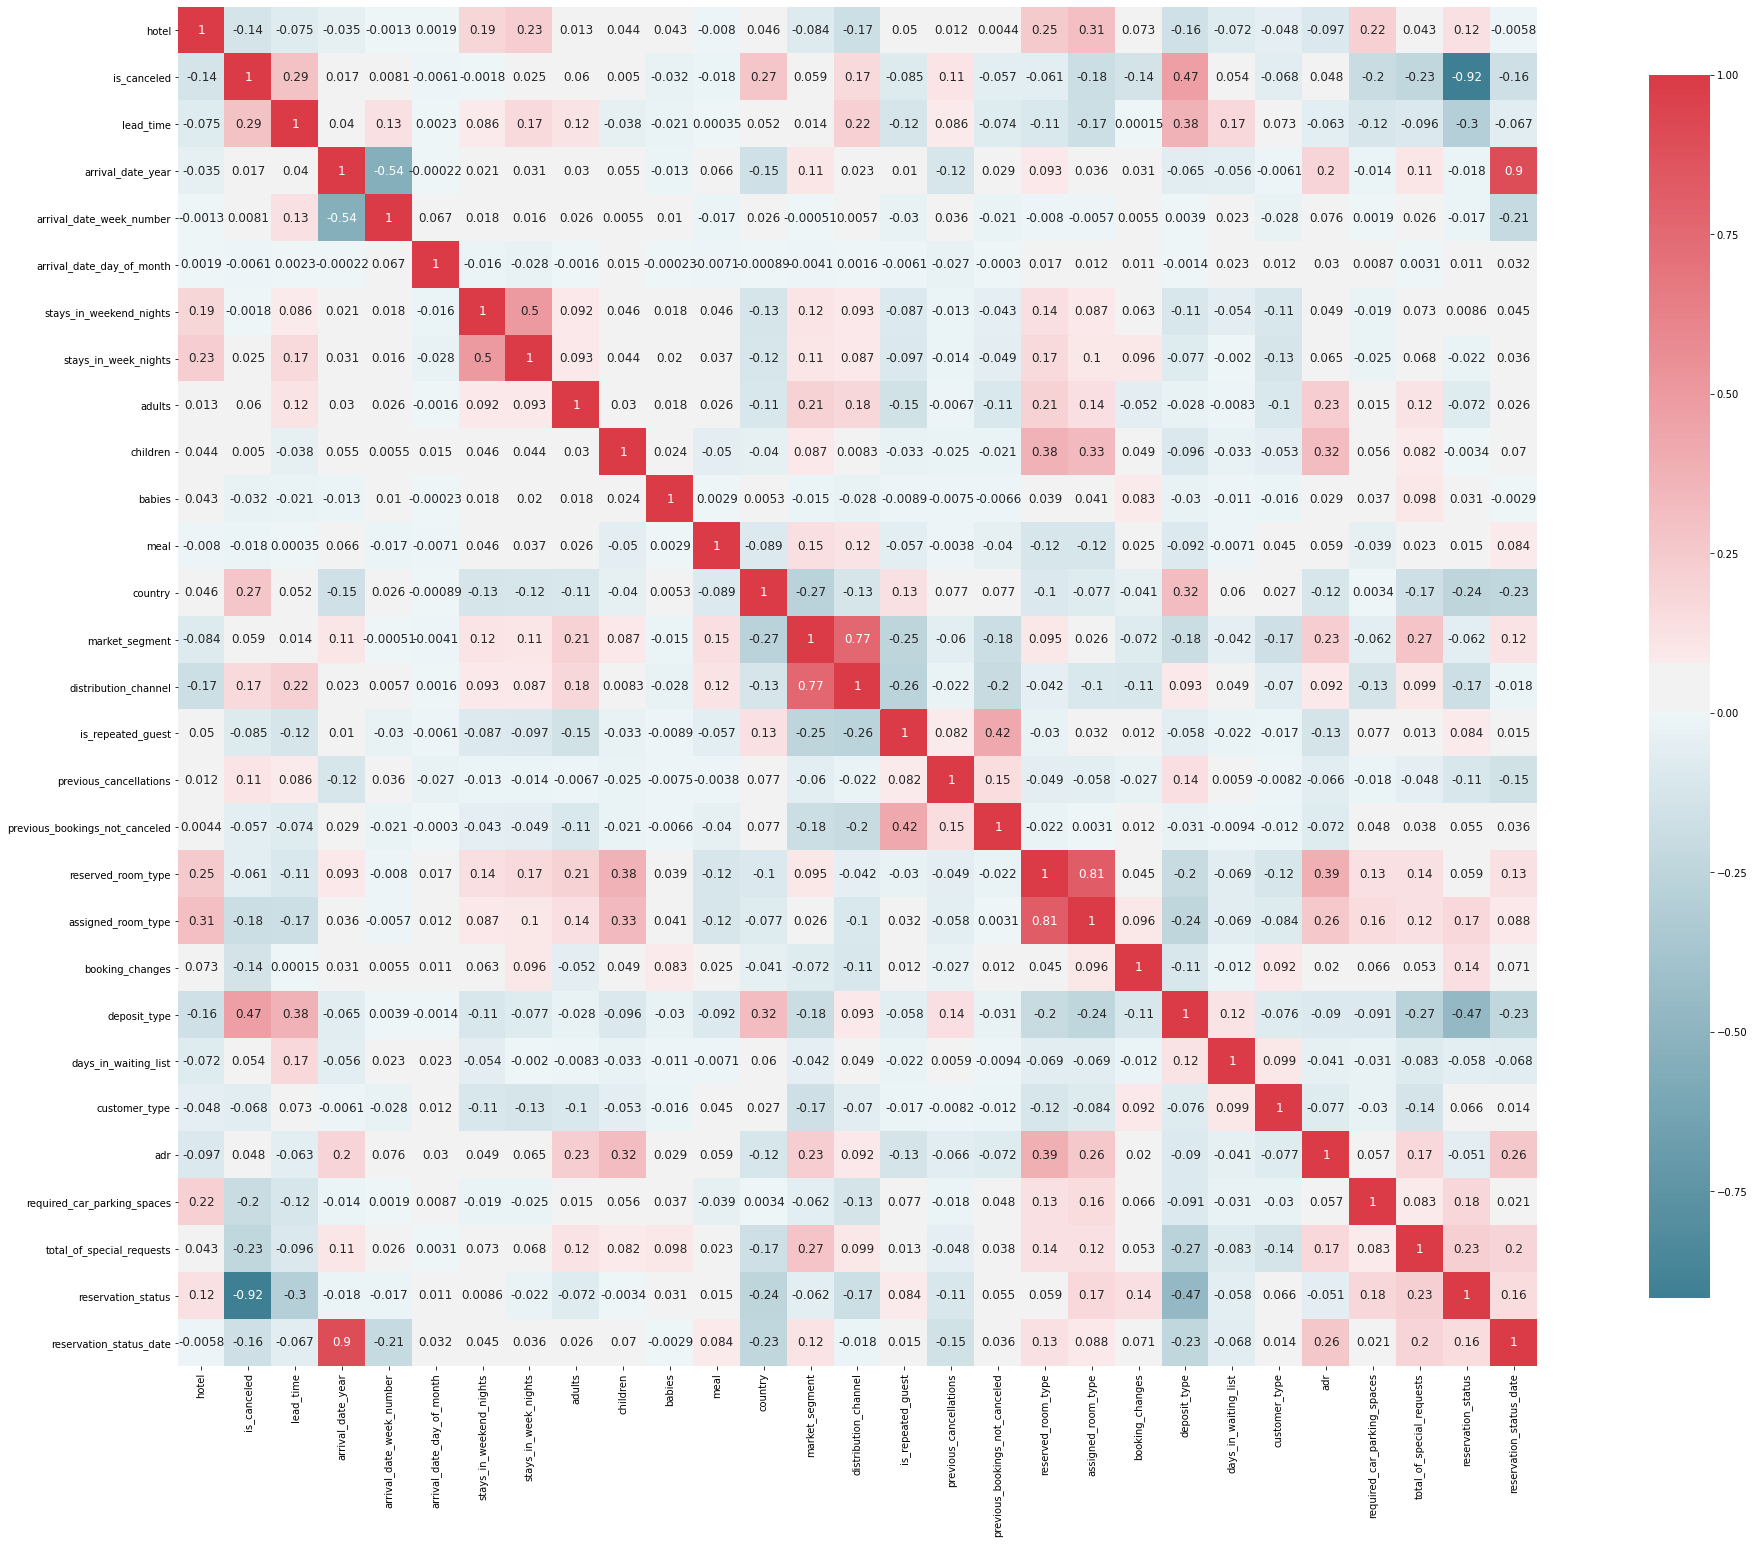

In [105]:
corr = df.corr()
s , ax = plt.subplots( figsize =( 40 , 25 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 }
)

#### Since we only want the correlation with the "is_canceled" feature, I'll change this code.

In [106]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

reservation_status                0.917196
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
reservation_status_date           0.162135
booking_changes                   0.144381
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
meal                              0.017678
arrival_dat

#### I'll only keep the 4 columns which have the highest correlation with the "is_canceled" column and I'll drop all the rest.

In [107]:
cor_target = abs(corr["is_canceled"])
#Selecting highly correlated features
relevantFeatures = cor_target[cor_target>0.19]
relevantFeatures

is_canceled                    1.000000
lead_time                      0.293123
country                        0.267502
deposit_type                   0.468634
required_car_parking_spaces    0.195498
total_of_special_requests      0.234658
reservation_status             0.917196
Name: is_canceled, dtype: float64

In [108]:
data = df[["is_canceled", "lead_time", "deposit_type", "required_car_parking_spaces",
           "total_of_special_requests"]]

#### Note : I'll not use country and reservation_status because they decrease the accuracy significantly despite their high correlation with the cancellation of the customers

In [109]:
data

,is_canceled,lead_time,deposit_type,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,0
1,0,737,0,0,0
2,0,7,0,0,0
3,0,13,0,0,0
4,0,14,0,0,1
...,...,...,...,...,...
119385,0,23,0,0,0
119386,0,102,0,0,2
119387,0,34,0,0,4
119388,0,109,0,0,0


## 5. Machine Learning

### 5.1 Logistic Regression

In [110]:
x = data.drop(['is_canceled'], axis=1) 
y = data[["is_canceled"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 30)
logreg = LogisticRegression(max_iter=120000)   #build our logistic model
logreg.fit(x_train, y_train.values.ravel())  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

#### Testing Accuracy

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

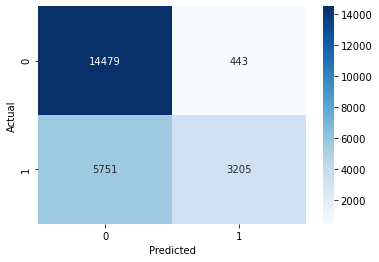

In [111]:
cf_matrix = pd.crosstab(y_test.values.ravel(), y_pred.ravel(), colnames=["Predicted"], rownames=["Actual"])
sns.heatmap(cf_matrix, annot=True, fmt ="d", cmap='Blues')

In [112]:
acc_log = logreg.score(x_test, y_test)
print("Accuracy={:.2f}".format(acc_log))
print(classification_report(y_test,y_pred))

Accuracy=0.74
              precision    recall  f1-score   support

           0       0.72      0.97      0.82     14922
           1       0.88      0.36      0.51      8956

    accuracy                           0.74     23878
   macro avg       0.80      0.66      0.67     23878
weighted avg       0.78      0.74      0.71     23878



##### That's a good accuracy score

#### ROC / AUC

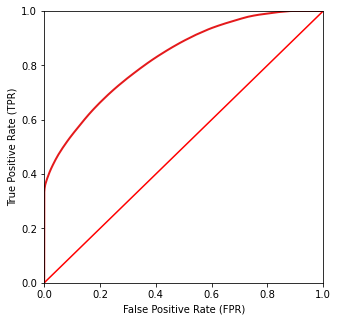

In [113]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train.values.ravel())
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'r')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    
plt.figure(figsize=(5, 5))
plot_roc_curve(fpr, tpr)
plt.show()

In [114]:
auc(fpr,tpr)

0.8280737593549569

### 5.2 KNN

In [115]:
x_train_k,x_test_k,y_train_k,y_test_k=train_test_split(x,y,test_size=0.2,random_state=30)

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_k,y_train_k.values.ravel())
y_pred_k=knn.predict(x_test_k)

#### Testing Accuracy

In [116]:
acc_knn = accuracy_score(y_pred_k,y_test_k)
print('Accuracy=',acc_knn)

Accuracy= 0.7486389144819499


### 5.3 Decision Tree

In [117]:
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x,y, test_size=0.20,random_state=10)

model = tree.DecisionTreeClassifier()  
model.fit(x_train_d, y_train_d)   #fitting our model
y_pred_d=model.predict(x_test_d)   # evaluating our model

#### Testing Accuracy

In [118]:
acc_dt = accuracy_score(y_test_d, y_pred_d)
print("score:{}".format(acc_dt))

score:0.7638411927297094


### 5.4 Random Forest

In [119]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train_r, y_train_r.values.ravel())  #Training our model
y_pred_r=clf.predict(x_test_r)  #testing our model

#### Testing Accuracy

In [120]:
acc_rf = metrics.accuracy_score(y_test_r, y_pred_r)
print("Accuracy:", acc_rf)

Accuracy: 0.762961722087277


#### All Accuracy Scores Ranked

In [121]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_log, acc_rf, acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
0.763841,Decision Tree
0.762962,Random Forest
0.748639,KNN
0.740598,Logistic Regression


### 5.5 Changing Different Values to improve the accuracy

#### Logistic Regression

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 30)
logreg = LogisticRegression(max_iter=120000)   #build our logistic model
logreg.fit(x_train, y_train.values.ravel())  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

##### New Accuracy

In [123]:
acc_log = logreg.score(x_test, y_test)
print("Accuracy=", acc_log)
print(classification_report(y_test,y_pred))

Accuracy= 0.743306251221487
              precision    recall  f1-score   support

           0       0.72      0.97      0.83     22455
           1       0.88      0.36      0.51     13362

    accuracy                           0.74     35817
   macro avg       0.80      0.67      0.67     35817
weighted avg       0.78      0.74      0.71     35817



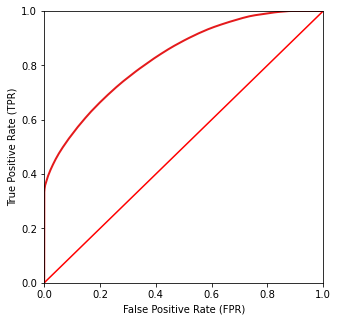

In [124]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train.values.ravel())
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'r')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    
plt.figure(figsize=(5, 5))
plot_roc_curve(fpr, tpr)
plt.show()

In [125]:
auc(fpr,tpr)

0.8288879094601583

#### KNN

In [126]:
x_train_k,x_test_k,y_train_k,y_test_k=train_test_split(x,y,test_size=0.15,random_state=30)

knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train_k,y_train_k.values.ravel())
y_pred_k=knn.predict(x_test_k)

##### New Accuracy

In [127]:
acc_knn = accuracy_score(y_pred_k,y_test_k)
print('Accuracy=',acc_knn)

Accuracy= 0.7427550393656821


#### Decision Tree

In [128]:
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x,y, test_size=0.3,random_state=10)

model = tree.DecisionTreeClassifier()  
model.fit(x_train_d, y_train_d)   #fitting our model
y_pred_d=model.predict(x_test_d)   # evaluating our model

##### New Accuracy

In [129]:
acc_dt = accuracy_score(y_test_d, y_pred_d)
print("score:{}".format(acc_dt))

score:0.7615936566434933


#### Random Forest

In [130]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x,y, test_size=0.15,random_state=10)
clf=RandomForestClassifier(n_estimators=20)
clf.fit(x_train_r, y_train_r.values.ravel()) 
y_pred_r=clf.predict(x_test_r)
y_pred_r = y_pred_r.reshape(y_pred_r.shape[0], 1)

##### New Accuracy

In [131]:
acc_rf = metrics.accuracy_score(y_test_r, y_pred_r)
print("Accuracy:", acc_rf)

Accuracy: 0.7659835836730136


#### New Rank

In [132]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_log, acc_rf, acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.765984,Random Forest
0.761594,Decision Tree
0.743306,Logistic Regression
0.742755,KNN


#### As you can see, the accuracy is always in the same zone (around .75)

### 5.6 Using K-Fold

#### Logistic Regression

In [133]:
cv = 10
logreg = LogisticRegression(max_iter=120000)
scores=cross_val_score(logreg,x,y.values.ravel(),cv=cv)
acc_log = sum(scores)/cv
print(acc_log)

0.7402881313342826


#### KNN

In [134]:
cv = 10
knn=KNeighborsClassifier(n_neighbors=10)
scores=cross_val_score(knn,x,y.values.ravel(),cv=cv)
acc_knn = sum(scores)/cv
print(acc_knn)

0.6954267526593517


#### Decision Tree

In [135]:
cv = 5
model = tree.DecisionTreeClassifier()  
scores=cross_val_score(model,x,y.values.ravel(),cv=cv)
acc_dt = sum(scores)/cv
print(acc_dt)

0.7201189379345003


#### Random Forest

In [136]:
cv = 5
clf=RandomForestClassifier(n_estimators=20)
scores=cross_val_score(clf,x,y.values.ravel(),cv=cv)
acc_rf = sum(scores)/cv
print(acc_rf)

0.7201524415780216


#### New Rank

In [137]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_knn, acc_log, acc_rf, acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.740288,Logistic Regression
0.720152,Random Forest
0.720119,Decision Tree
0.695427,KNN


#### Unfortunately, our accuracy decreased.

#### We could do this for hours, and I'm sure that there are values that could help us find a better accuracy ...

### 5.7 Prediction Example

#### As said above, the highest accuracy is the Decision Tree so we'll use it for our predictions

In [139]:
lead_time = int(input("Type the Lead Time : "))
deposit_type = int(input("Type the Deposit Type (0: No Deposit / 1: Non-Refundable / 2: Refundable): "))
required_car_parking_spaces = int(input("Type the Required Car Parking Spaces : "))
total_of_special_requests = int(input("Type the Total of Special Requests : "))
inputs = [lead_time, deposit_type, required_car_parking_spaces, total_of_special_requests]
predictions = pd.DataFrame([inputs],
                           columns=["lead_time", "deposit_type", "required_car_parking_spaces", "total_of_special_requests"]) 

x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x,y, test_size=0.20,random_state=10)
model = tree.DecisionTreeClassifier()  
model.fit(x_train_d, y_train_d) 
pred = model.predict(predictions)

if pred == 0:
    print("Customer's coming")
else:
    print("Customer's not coming")

Type the Lead Time : 7
Type the Deposit Type (0: No Deposit / 1: Non-Refundable / 2: Refundable): 1
Type the Required Car Parking Spaces : 0
Type the Total of Special Requests : 0
Customer's not coming


### Thank you for your attention !